# TTDS: Machine Learning project 

# Accuracy Improved KNNeighbour Algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:/DataSets/diabetes.csv")

In [3]:
data

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Dataset Extension

In [4]:
# Generate synthetic data by doubling the 'label' values
data_synthetic = data.copy()

# Concatenate the original and synthetic DataFrames
df = pd.concat([data, data_synthetic], ignore_index=True)

# Display the extended DataFrame
df

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head(10)

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.tail()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1
1535,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.dtypes

preg              int64
glucose           int64
bp_diastolic      int64
skin_triceps      int64
insulin           int64
bmi             float64
pedigree        float64
age               int64
label             int64
dtype: object

# Descriptive Satistics:

In [8]:
print("Number of Row in the Dataset:", df.shape[0])
print("Number of Columns in the Dataset:", df.shape[1])

Number of Row in the Dataset: 1536
Number of Columns in the Dataset: 9


In [9]:
df.head(10)

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
df.tail()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1
1535,1,93,70,31,0,30.4,0.315,23,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   preg          1536 non-null   int64  
 1   glucose       1536 non-null   int64  
 2   bp_diastolic  1536 non-null   int64  
 3   skin_triceps  1536 non-null   int64  
 4   insulin       1536 non-null   int64  
 5   bmi           1536 non-null   float64
 6   pedigree      1536 non-null   float64
 7   age           1536 non-null   int64  
 8   label         1536 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.1 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,1536.0,3.845052,3.368480,0.000,1.00000,3.0000,6.00000,17.00
glucose,1536.0,120.894531,31.962202,0.000,99.00000,117.0000,140.25000,199.00
bp_diastolic,1536.0,69.105469,19.349501,0.000,62.00000,72.0000,80.00000,122.00
skin_triceps,1536.0,20.536458,15.947021,0.000,0.00000,23.0000,32.00000,99.00
insulin,1536.0,79.799479,115.206457,0.000,0.00000,30.5000,127.25000,846.00
bmi,1536.0,31.992578,7.881592,0.000,27.30000,32.0000,36.60000,67.10
pedigree,1536.0,0.471876,0.331221,0.078,0.24375,0.3725,0.62625,2.42
age,1536.0,33.240885,11.756400,21.000,24.00000,29.0000,41.00000,81.00
label,1536.0,0.348958,0.476796,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
#check label value count 
data.label.value_counts()

0    500
1    268
Name: label, dtype: int64

# Missing Values:

In [14]:
df.isnull().sum()

preg            0
glucose         0
bp_diastolic    0
skin_triceps    0
insulin         0
bmi             0
pedigree        0
age             0
label           0
dtype: int64

In [15]:
#check missing Values in the Dataset
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

preg
False    1536
Name: preg, dtype: int64

glucose
False    1536
Name: glucose, dtype: int64

bp_diastolic
False    1536
Name: bp_diastolic, dtype: int64

skin_triceps
False    1536
Name: skin_triceps, dtype: int64

insulin
False    1536
Name: insulin, dtype: int64

bmi
False    1536
Name: bmi, dtype: int64

pedigree
False    1536
Name: pedigree, dtype: int64

age
False    1536
Name: age, dtype: int64

label
False    1536
Name: label, dtype: int64



No missing values found in the dataset, therefore data doesn't need to be drop or replace. 

# Outliers Analysis

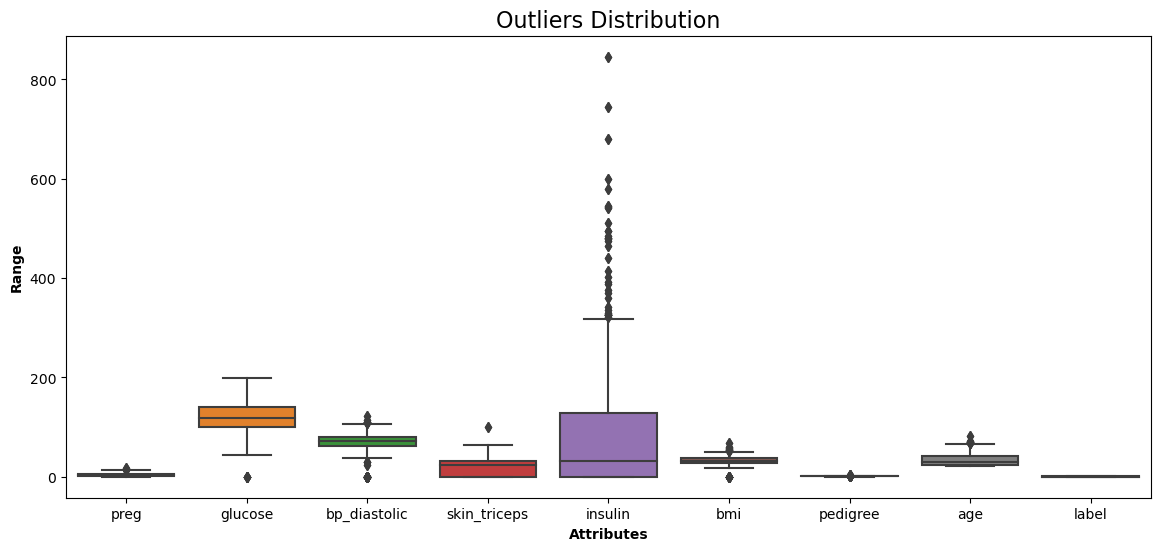

In [16]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
show_boxplot(df)

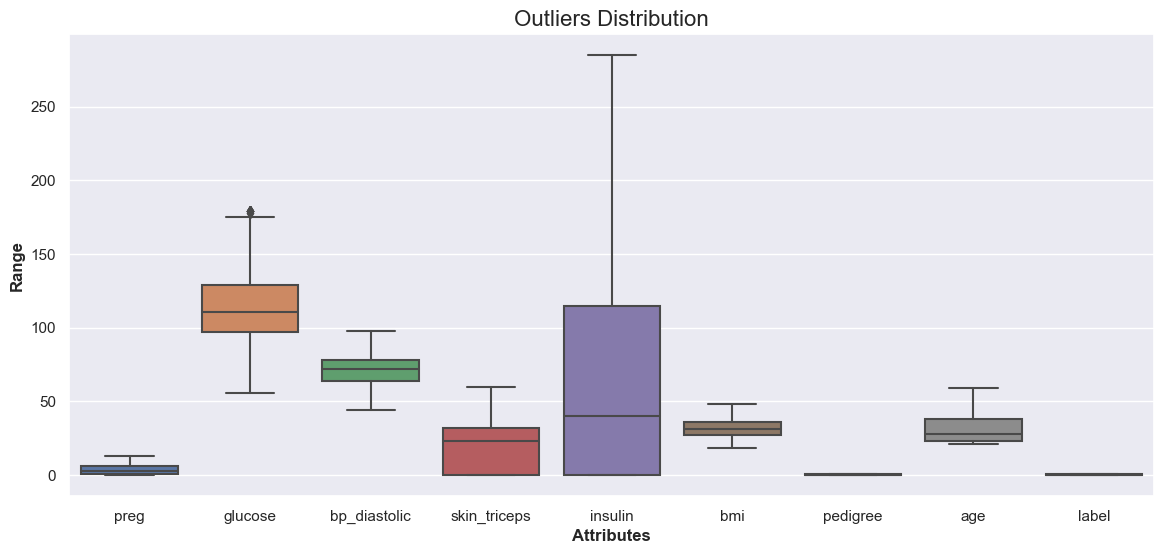

In [53]:
#Function 1st time
def remove_outliers(data):
   
    df = data.copy()

    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.25)
        Q3 = df[str(col)].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bounds to filter outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]

    return df
without_outliers = remove_outliers(df)
show_boxplot(without_outliers)

NOTE: Outliers completely removed, after function has been run two to three times. 

In [54]:
df=without_outliers

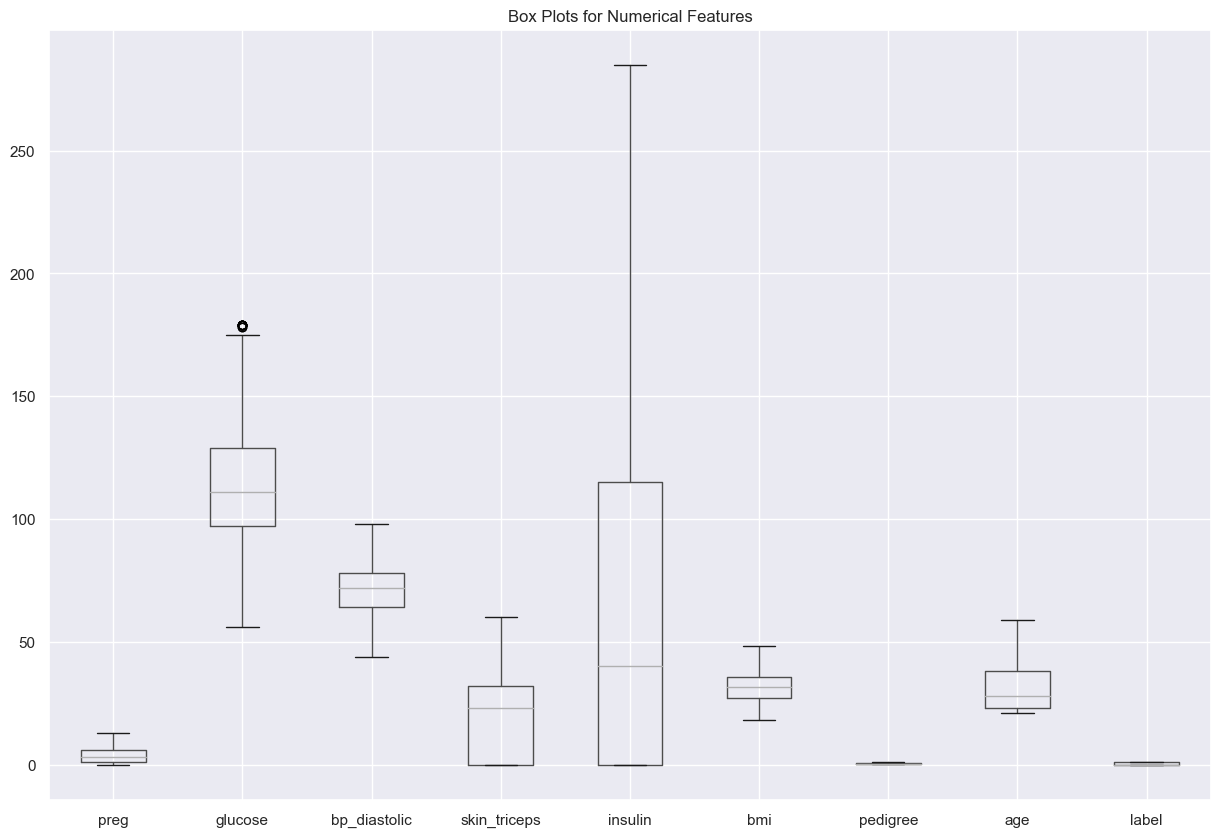

In [57]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots for Numerical Features')
plt.show()

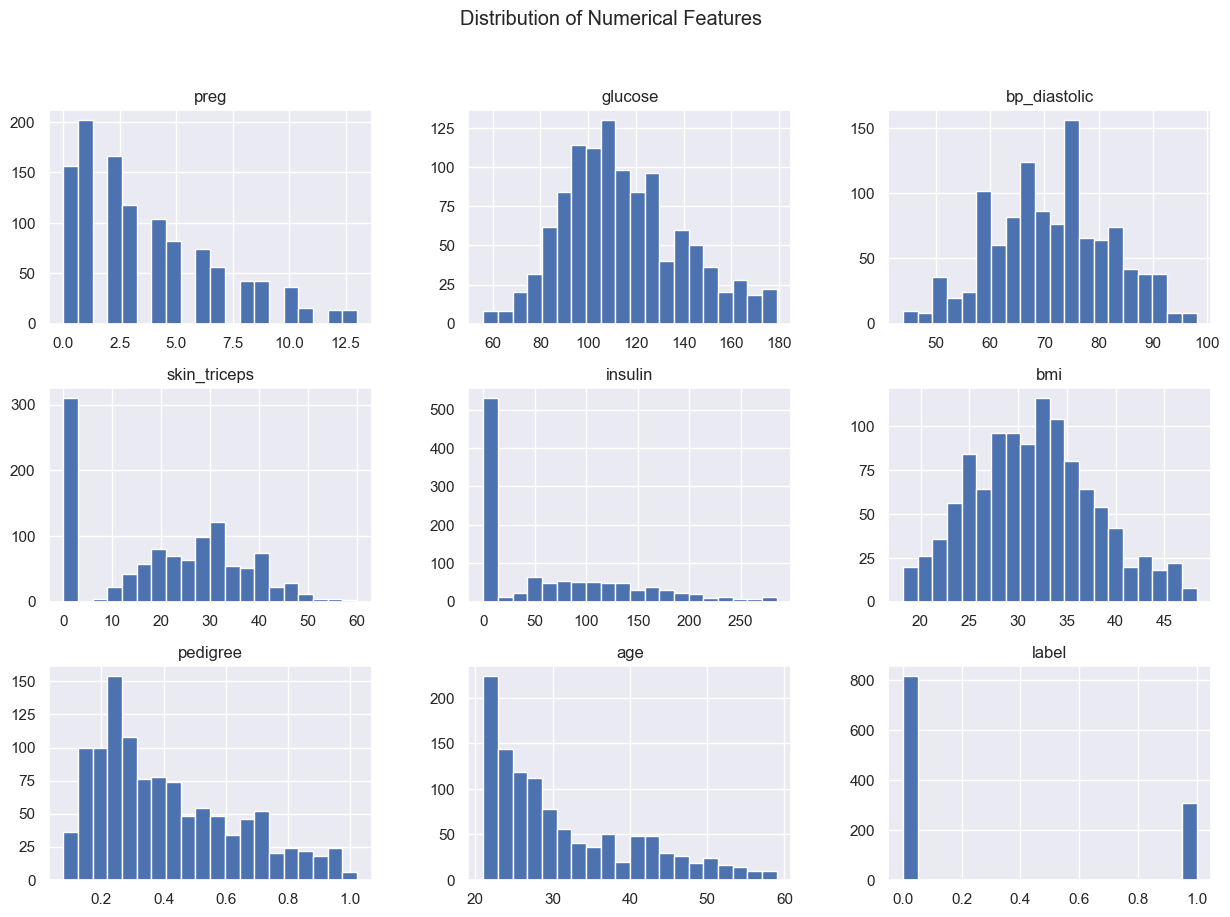

In [55]:
# Distribution of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# HeatMap

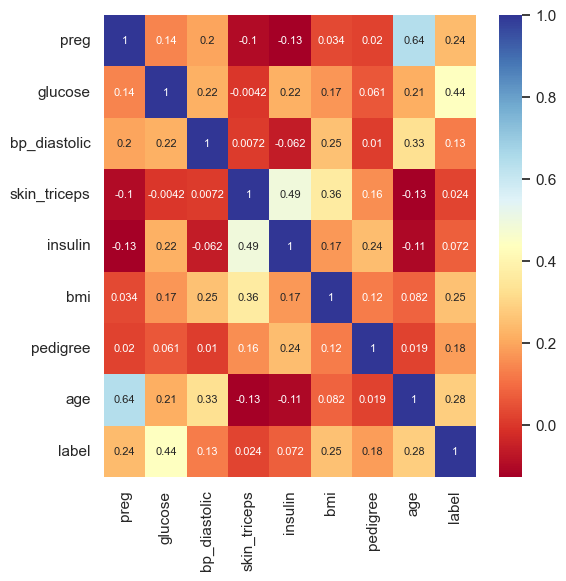

In [56]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu", annot_kws={"fontsize": 8});

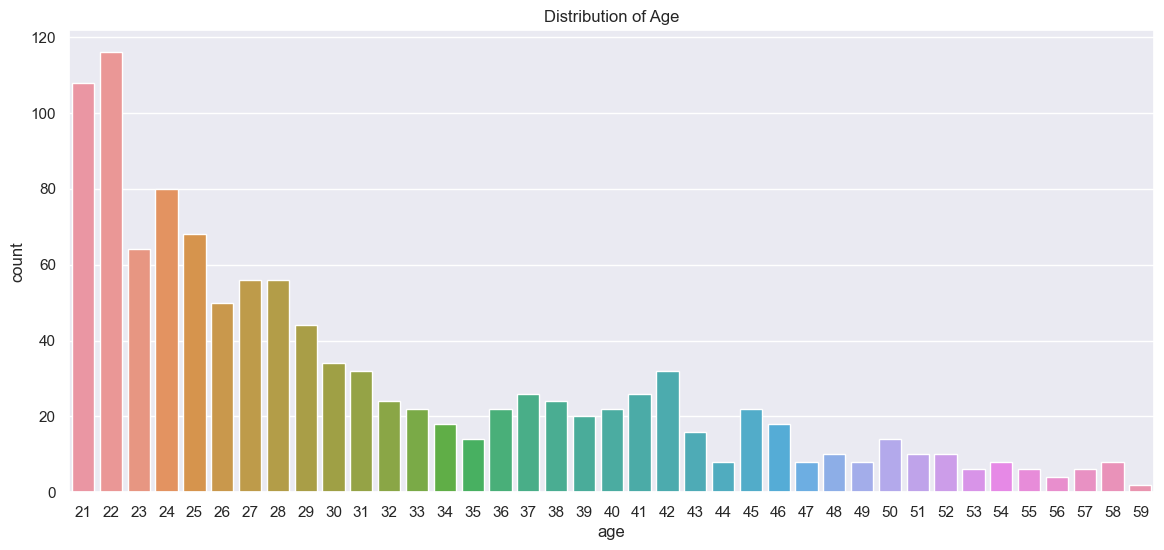

In [58]:
# Distribution of categorical features
sns.countplot(x='age', data=df)
plt.title('Distribution of Age')
plt.show()

In [59]:
print(df.shape[0])
print(df.shape[1])

1122
9


In [60]:
df.label.value_counts()

0    816
1    306
Name: label, dtype: int64

In [61]:
df.columns

Index(['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi',
       'pedigree', 'age', 'label'],
      dtype='object')

In [62]:
cols=list(df.columns)
cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [63]:
df.shape

(1122, 9)

In [64]:
feature_cols=cols[0:8]
print(feature_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


In [65]:
feature_cols=['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']
print(feature_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


# Data Train-Test split

In [66]:
#Library Call for data split in two portion Train and Test: 
from sklearn.model_selection import train_test_split

In [163]:
#dataframe
x=df[feature_cols]  #feature
#series
y=df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state=0)

In [164]:
#Total size of the Training dataset:
print("[XY_Train] dataset Shape:", x_train.shape)

#Total size of the Testing dataset:
print("[XY_Test] dataset Shape:", x_test.shape)

[XY_Train] dataset Shape: (897, 8)
[XY_Test] dataset Shape: (225, 8)


In [165]:
#get total number of 0 in the actual dataset
count0=df["label"][df.label==0].count()
print("Total Number of 0's in Label:", count0)

Total Number of 0's in Label: 816


In [166]:
#get total number of 1 in the actual dataset
count1=df["label"][df.label==1].count()
print("Total Number of 1's in Label:", count1)

Total Number of 1's in Label: 306


In [167]:
#Checking the number of 0's in Training portion of the Dataset:
print("[Y_Train] Total number of [0] in dataset :", len(y_train[y_train==0]))

#Checking the number of 1's in Training portion of the Dataset:
print("[Y_Train] Total number of [1] in dataset :", len(y_train[y_train==1]))

[Y_Train] Total number of [0] in dataset : 644
[Y_Train] Total number of [1] in dataset : 253


In [168]:
#Checking the number of 0's in Testing portion of the Dataset:
print("[Y_Test] Total number of [0] in dataset :", len(y_test[y_test==0]))

#Checking the number of 1's in Testing portion of the Dataset:
print("[Y_Test] Total number of [1] in dataset :", len(y_test[y_test==1]))

[Y_Test] Total number of [0] in dataset : 172
[Y_Test] Total number of [1] in dataset : 53


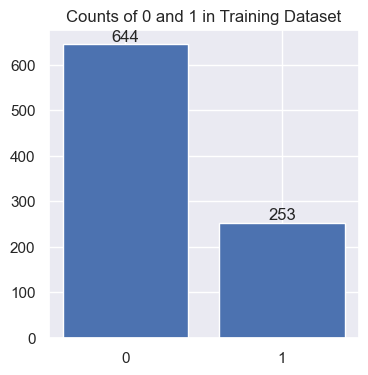

In [169]:
# get total number of 0 in the training dataset
Trcount0 = y_train[y_train==0].count()

# get total number of 1 in the training dataset
Trcount1 = y_train[y_train==1].count()

# Plotting the bar chart
label = ['0', '1']
counts = [Trcount0, Trcount1]

plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(label, counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

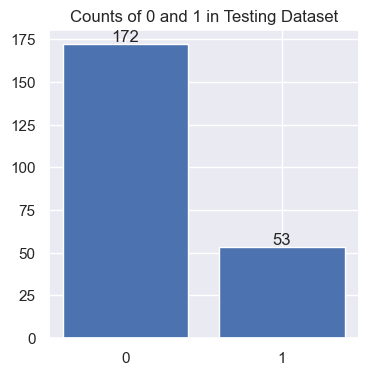

In [170]:
# get total number of 0 in the testing dataset
Trcount0 = y_test[y_test==0].count()

# get total number of 1 in the testing dataset
Trcount1 = y_test[y_test==1].count()

# Plotting the bar chart
label = ['0', '1']
counts = [Trcount0, Trcount1]

plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Testing Dataset')
plt.bar(label, counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

# KNeighbour Library call

In [171]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=3)

In [172]:
# Train Classifer
model = clf.fit(x_train, y_train)

# Model

In [173]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [174]:
y=pd.DataFrame({"Origional": y_test, "Predicted": y_pred})
y.head()

,Origional,Predicted
1069,1,0
1271,0,0
548,0,0
1396,0,1
704,0,0


In [175]:
y.sample(10)

,Origional,Predicted
682,0,0
1412,0,0
410,0,0
1470,1,1
1534,1,1
278,0,0
650,0,0
1467,0,0
801,0,0
282,0,0


# Confusion Matrics

Confusion Matrix:
[[145  27]
 [ 19  34]]


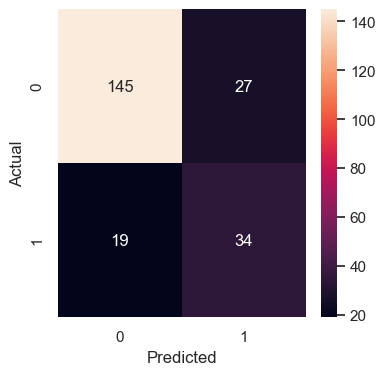

In [176]:
# calculate accuracy
from sklearn import metrics

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation

In [177]:
#[row, column]
#(Actual, Predict)
TP = result[1, 1]      
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

In [178]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.7955555555555556
Sensitivity:	 0.6415094339622641
Specificity:	 0.8430232558139535
Precision:	 0.5573770491803278
Classification Eerror: 0.20444444444444443
False_Positive_Rate: 0.15697674418604646
###########################################
